1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys

In [2]:
df=pd.read_csv('TSLA.CSV')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
## Univeriate analysis
stock_data=df[['Date','Close']]

In [5]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

/tmp/ipykernel_102/3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [9]:
stock_data.set_index('Date',inplace=True)

In [10]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [11]:
## Data Ingestion is completed

## EDA of DATA

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [12]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


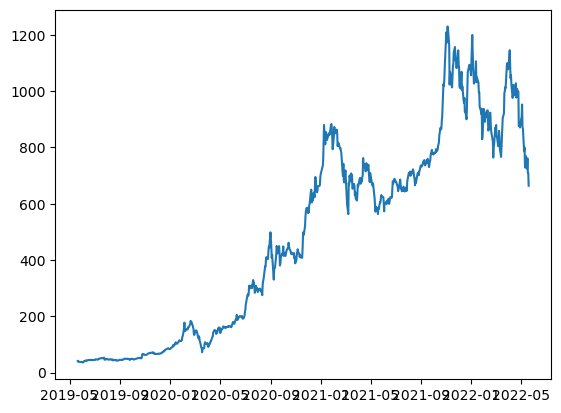

In [13]:
plt.plot(stock_data['Close'])

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

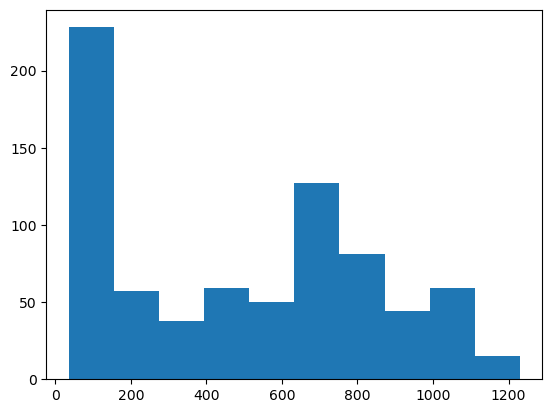

In [14]:
plt.hist(stock_data.Close)

In [15]:
import seaborn as sns

<AxesSubplot: xlabel='Close', ylabel='Count'>

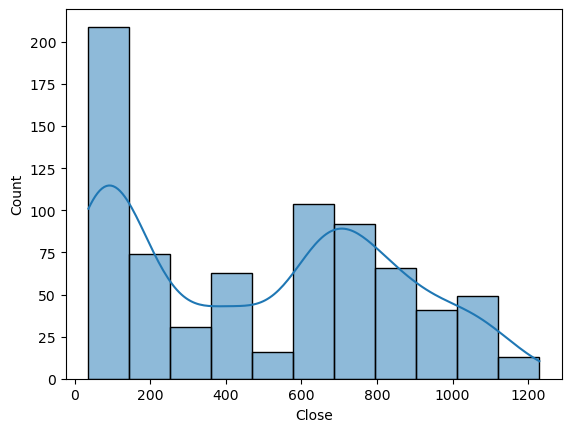

In [16]:
sns.histplot(stock_data.Close,kde=True)

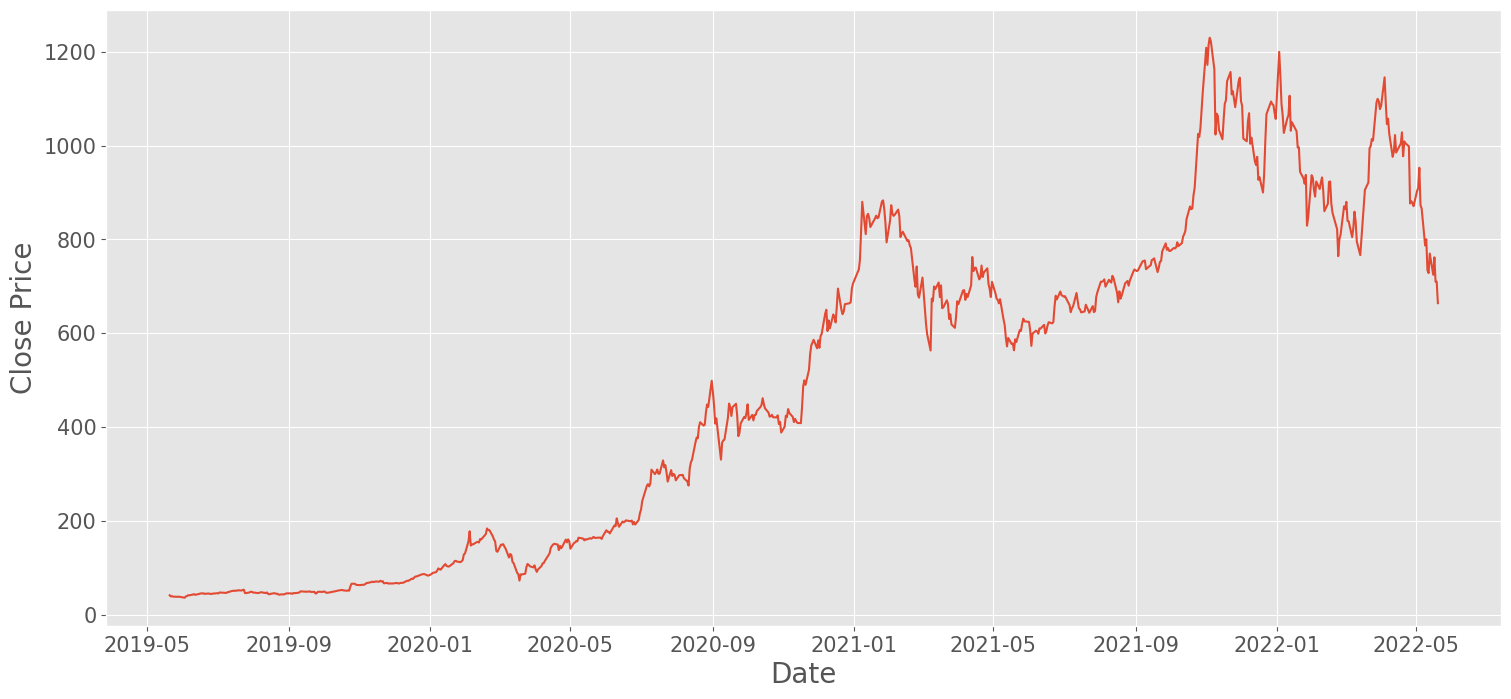

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(stock_data['Close'])
plt.xticks(fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Close Price',fontsize=20)
plt.show()

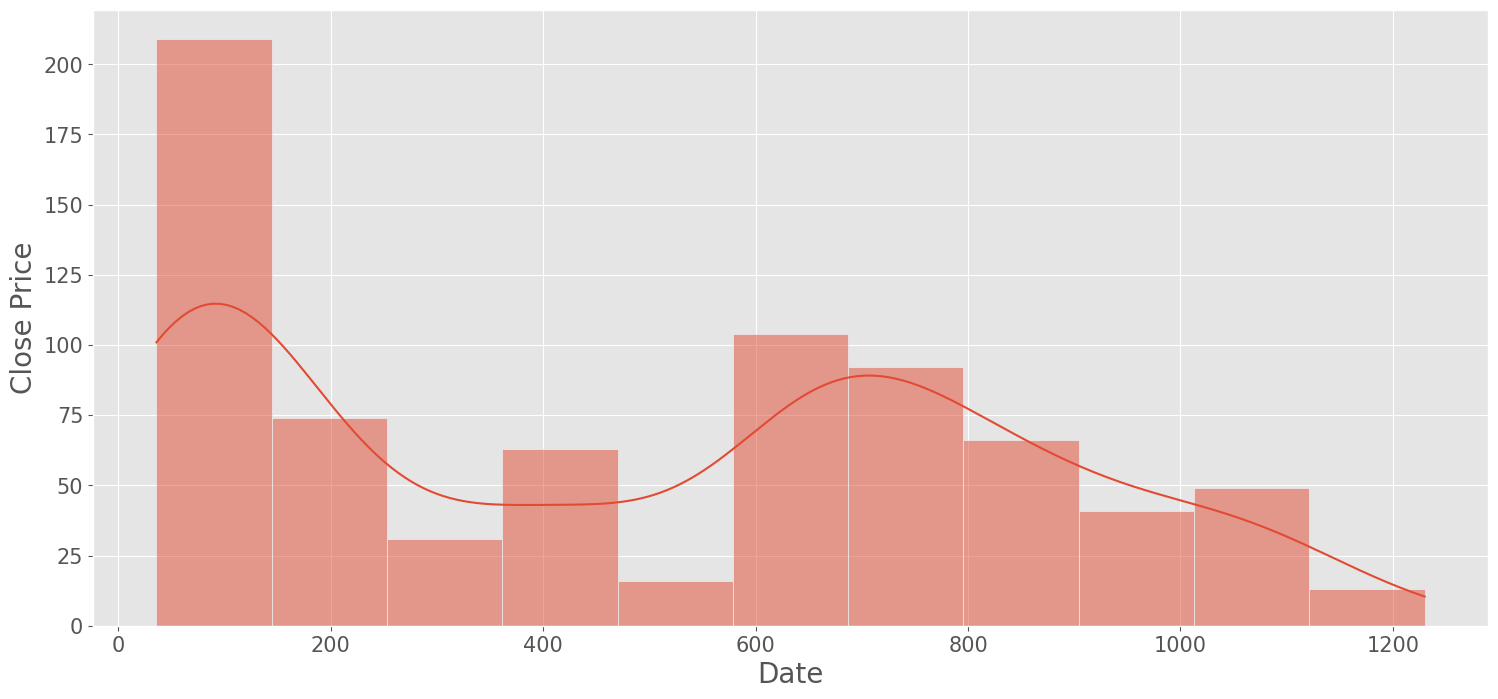

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
sns.histplot(stock_data['Close'],kde=True)
plt.xticks(fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Close Price',fontsize=20)
plt.show()

In [19]:
stock_data['Close'].rolling(window=3).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [20]:
## Moving Average
rol_mean=stock_data['Close'].rolling(window=12).mean()

In [21]:
rol_mean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [22]:
rol_std=stock_data['Close'].rolling(window=12).std()

In [23]:
rol_std

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    78.887958
2022-05-17    79.606002
2022-05-18    80.253903
2022-05-19    76.455365
2022-05-20    63.033361
Name: Close, Length: 758, dtype: float64

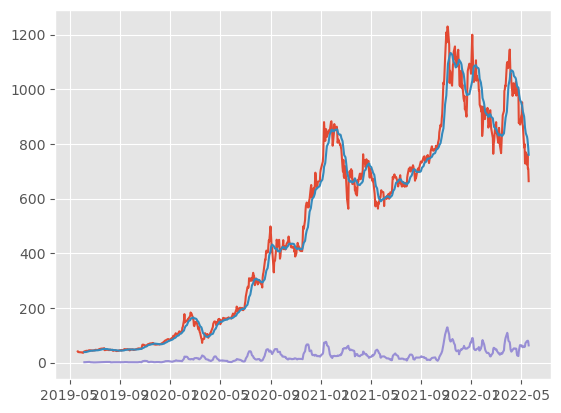

In [24]:
plt.plot(stock_data.Close)
plt.plot(rol_mean)
plt.plot(rol_std)

In [25]:
## As we increase the window size it becomes more smopth
rol_mean=stock_data['Close'].rolling(window=120).mean()
rol_std=stock_data['Close'].rolling(window=120).std()


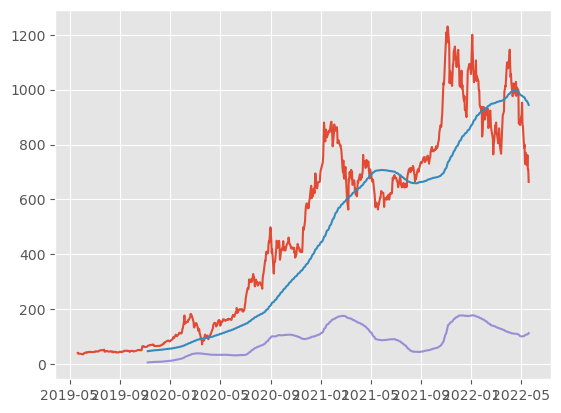

In [26]:
plt.plot(stock_data.Close)
plt.plot(rol_mean)
plt.plot(rol_std)

In [27]:
## Adafuller test
from statsmodels.tsa.stattools import adfuller

In [28]:
adt=adfuller(stock_data.Close)

In [29]:
adt

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [30]:
pd.Series(adt[0:4],index=['test stats','p value','lag','data points'])

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

<AxesSubplot: >

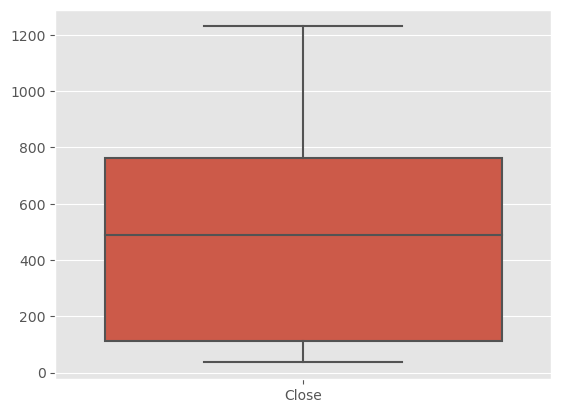

In [31]:
## find outliers
sns.boxplot(stock_data)

## no outliers

In [32]:
## time series decomposition(components)
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
result=seasonal_decompose(stock_data.Close,period=12)

In [34]:
result

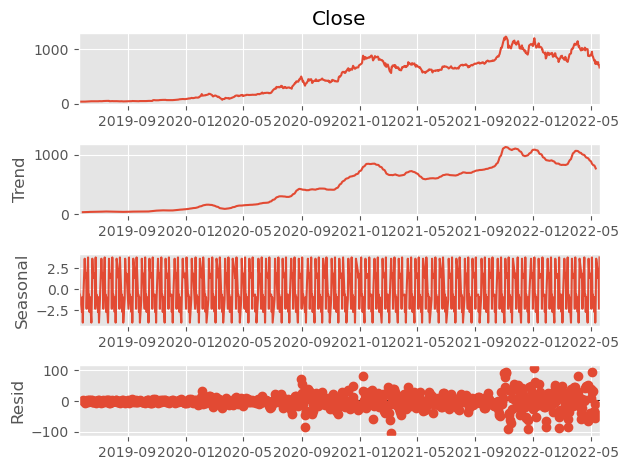

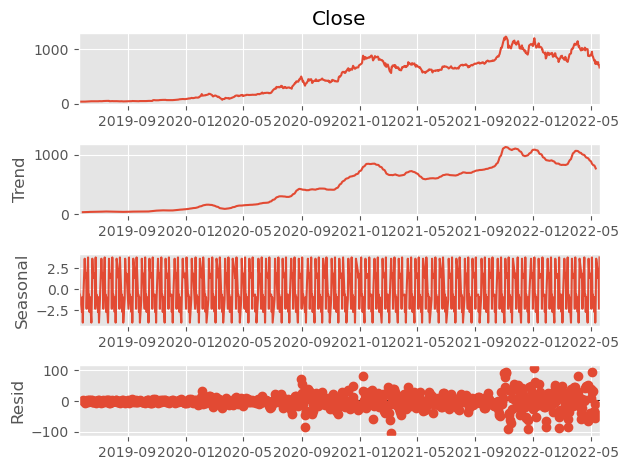

In [35]:
result.plot()

In [36]:
## it is showing both additive and multiplicative

## PACF,ACF

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


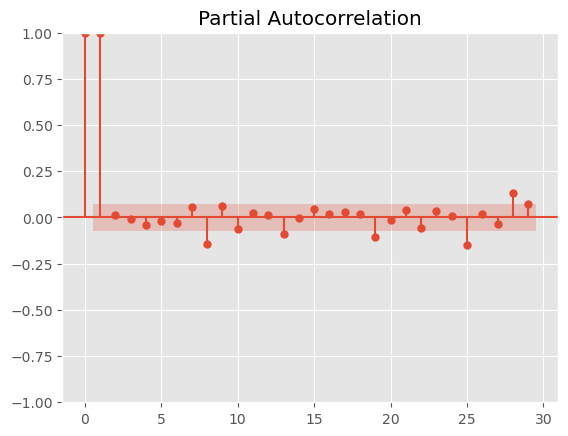

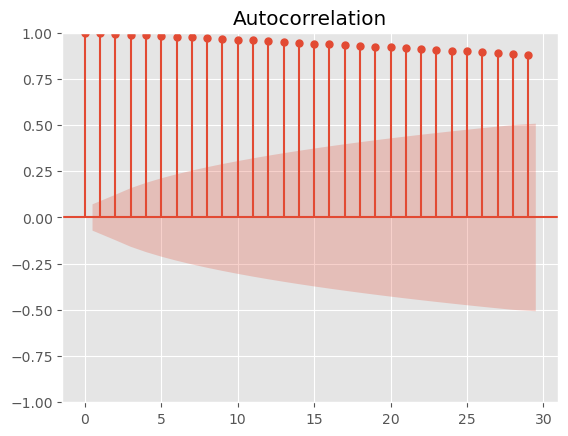

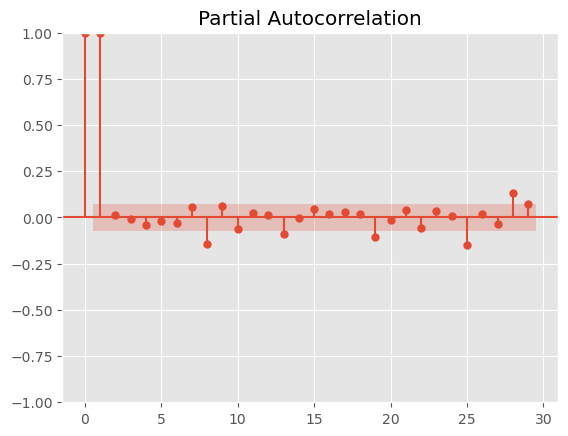

In [38]:
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

## y-axis is correlation and x-axis is lag value
## acf shows curve bcz data is not stationary

## Converting non-stationary to stationary

In [39]:
x_close=stock_data.Close

In [40]:
x_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

## differencing helps to convert non-stationary to stationary

In [41]:
x_close_diff=x_close.diff()

In [42]:
x_close_diff

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [43]:
x_close_diff=x_close_diff.dropna()

In [44]:
x_close_diff

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

In [45]:
#Test for staionarity
def test_stationarity(x_close_diff):
    # Determing rolling statistics
    rolmean = x_close_diff.rolling(48).mean() # rolling mean
    rolstd = x_close_diff.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(x_close_diff, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

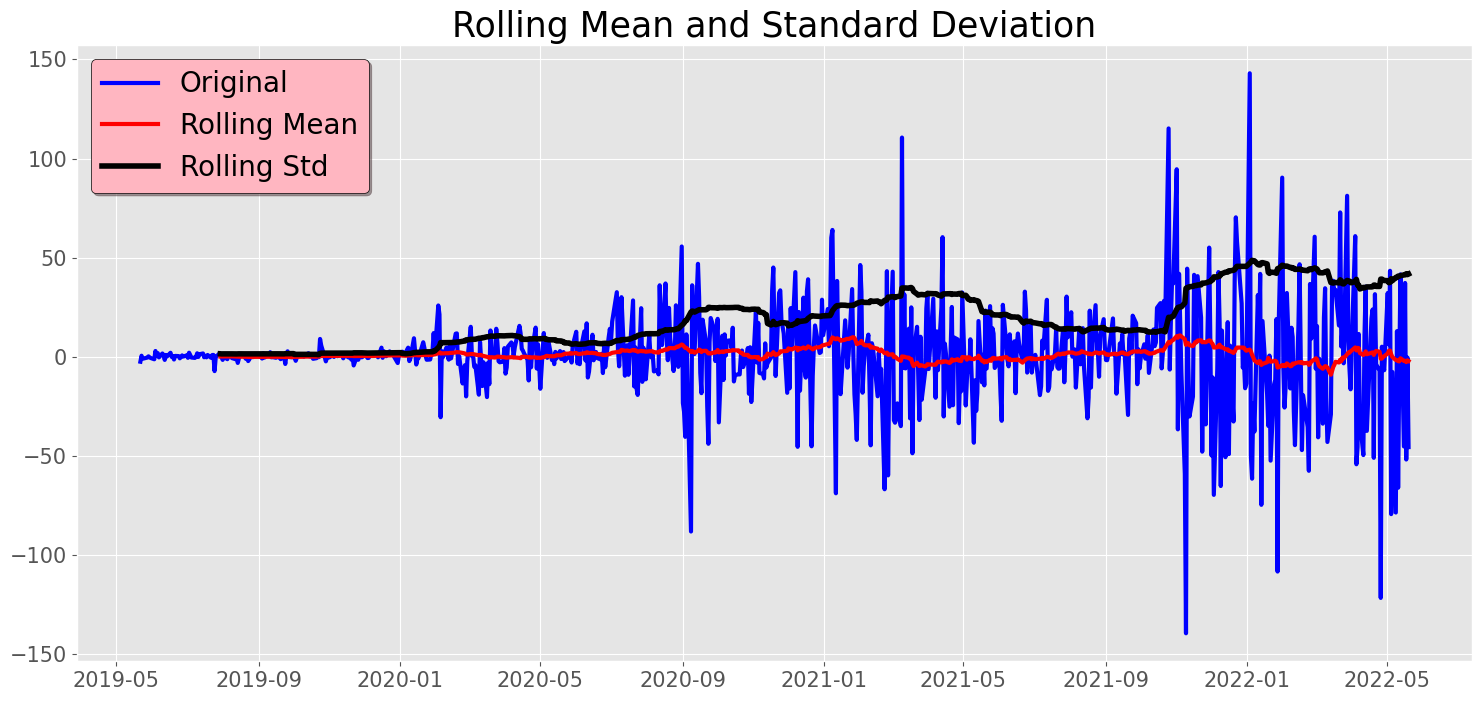

In [46]:
test_stationarity(x_close_diff)

## This is stationary data

## Now we will do model building

In [47]:
## split data in train data and test data

In [48]:
train_data=stock_data['Close'][0:-60]
test_data=stock_data['Close'][-60:]

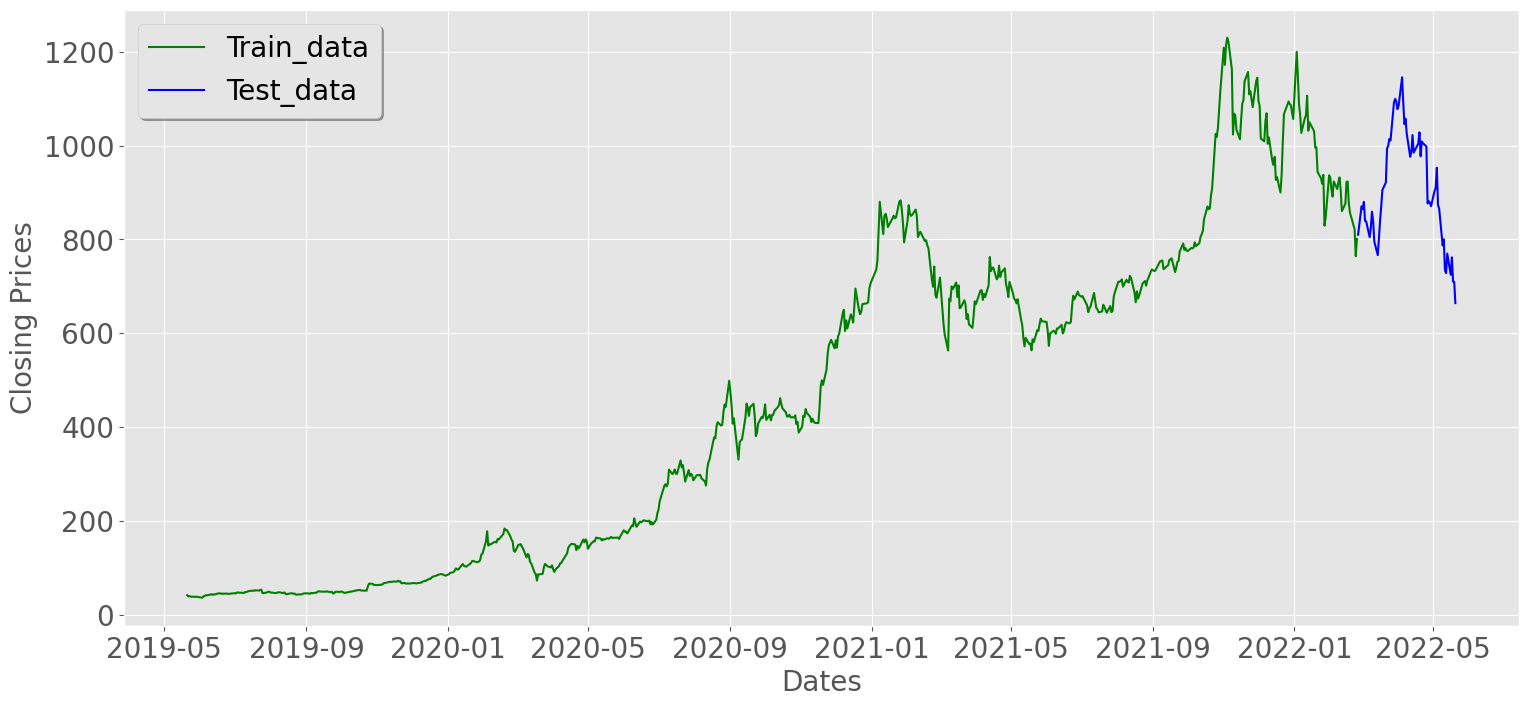

In [49]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(train_data,'green',label='Train_data')
plt.plot(test_data,'blue',label='Test_data')
plt.legend(fontsize=20,shadow=True)

In [50]:
## import libraries
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
history=[x for x in train_data]            

In [52]:
arima=ARIMA(history,order=(1,1,1))

In [53]:
model=arima.fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Thu, 22 Jun 2023   AIC                           6306.700
Time:                        05:33:45   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model.forecast()

array([800.20438321])

In [56]:
mean_squared_error([test_data[0]],model.forecast())

93.42405358558581

In [98]:
def train_model(train,test,order_arima):
    history=[x for x in train]
    prediction=list()
    for i in range(len(test)):
        arima=ARIMA(history,order=order_arima)
        model=arima.fit()
        pred=model.forecast()[0]
        prediction.append(pred)
        history.append(test[i])
        
    rmse=np.sqrt(mean_squared_error(test,prediction))
    return rmse

In [109]:
def evaluate_model(train_data,test_data,p_value,d_value,q_value):
    train=train_data.astype('float32')
    best_score,best_cfg=float('inf'),None
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
                try:
                    rmse=train_model(train,test_data,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                        
                    print('score{} and order{}'.format(best_score,best_cfg))
                        
                except:
                    continue
                    
                    
    print('best score {} and order {}'.format(best_score,best_cfg))                
                
                
    
    

In [110]:
### for different values of p,d,q
import warnings
warnings.filterwarnings('ignore')
p_value=range(0,3)
d_value=range(0,3)
q_value=range(0,3)
evaluate_model(train_data,test_data,p_value,d_value,q_value)

score457.4144164149724 and order(0, 0, 0)
score241.16371929407057 and order(0, 0, 1)
score165.49133349278682 and order(0, 0, 2)
score39.51639749939755 and order(0, 1, 0)
score39.48249922478982 and order(0, 1, 1)
score39.48249922478982 and order(0, 1, 1)
score39.48249922478982 and order(0, 1, 1)
score39.48249922478982 and order(0, 1, 1)
score39.48249922478982 and order(0, 1, 1)
score39.47656498115289 and order(1, 0, 0)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.449364942739216 and order(1, 0, 1)
score39.43995654201625 and order(2, 0, 0)
score39.43995654201625 and order(2, 0, 0)
score39.43995654201625 and order(2, 0, 0)
score39.43995654201625 and order(2, 0, 0)
score39.43995654201625 and order(2, 0, 0)
score39.43995654201625 a

In [112]:
## now forecast using this order
history=[x for x in train_data]
prediction=[]
for i in range(len(test_data)):
    arima=ARIMA(history,order=(2,0,0))
    model=arima.fit()
    pred=model.forecast()[0]
    prediction.append(pred)
    history.append(test_data[i])

    
rmse=np.sqrt(mean_squared_error(test_data,prediction))
print(rmse)

39.43992944070974


In [113]:
rmse

39.43992944070974

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label='True test close value')
plt.plot(range(len(prediction)),prediction,label='Predicted close value')
plt.xticks(fontsize=15)
plt.legend(fontsize=20,shadow=True)